In [60]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Dense, Flatten
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [61]:
image_size=[224,224]

train_path="dataset/Train/"
test_path="dataset/test/"

In [62]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=image_size + [3])

In [63]:
for layer in vgg_model.layers:
    layer.trainable=False

In [64]:
data=glob.glob("dataset/Train/*")

In [65]:
x=Flatten()(vgg_model.output)
prediction=Dense(len(data),activation="softmax")(x)

In [66]:
model=Model(inputs=vgg_model.input , outputs=prediction)

In [67]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [68]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [69]:
datagen = ImageDataGenerator()
train_set = datagen.flow_from_directory('dataset/Train/', class_mode='categorical', batch_size=20,target_size=(224,224))
test_set = datagen.flow_from_directory('dataset/test/', class_mode='categorical', batch_size=20,target_size=(224,224))

Found 840 images belonging to 2 classes.
Found 645 images belonging to 2 classes.


In [70]:
history=model.fit(train_set,validation_data=test_set,epochs=2,shuffle=True)

Epoch 1/2
42/42 [==============================] - 418s 10s/step - loss: 0.9186 - acc: 0.9583 - val_loss: 0.3548 - val_acc: 0.9922
Epoch 2/2
42/42 [==============================] - 452s 11s/step - loss: 0.0958 - acc: 0.9940 - val_loss: 0.2743 - val_acc: 0.9907


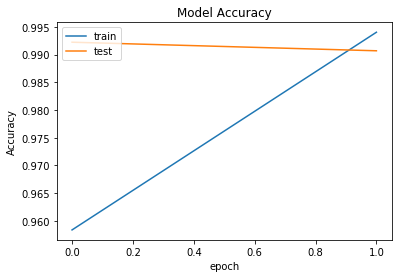

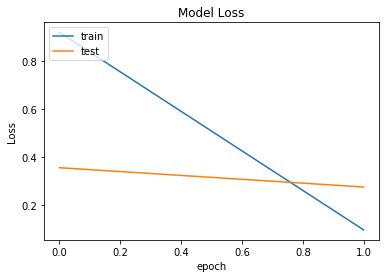

In [71]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
         
         
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
model.save("Updated_Face_Mask.h5")

In [73]:
(train_set.class_indices)

{'WithMask': 0, 'WithoutMask': 1}

In [76]:
def pre(image_name):
    face_cascade = cv2.CascadeClassifier('face.xml')
    img = cv2.imread(image_name)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = face_cascade.detectMultiScale(RGB_img, 1.1,3)
    for (x, y, w, h) in faces:
        cv2.rectangle(RGB_img, (x, y), (x+w, y+h), (255, 255, 0), 1)
    crop=RGB_img[y:y + h, x:x + w]
    resized=cv2.resize(crop,(224,224))
    x = np.expand_dims(resized, axis=0)
    images = np.vstack([x])
    pp=plt.imread(image_name)
    show=plt.imshow(pp)
    output=model.predict(images)
    if np.argmax(output, axis=-1)[0] == 0:
        print("With Mask")
    else:
        print("Without mask")
    return show

Without mask


(<matplotlib.image.AxesImage at 0x7f834498f550>,)

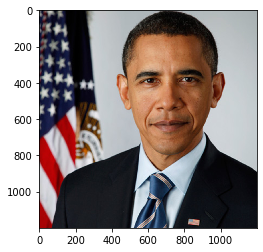

In [78]:
pre("ob.jpg"),

With Mask


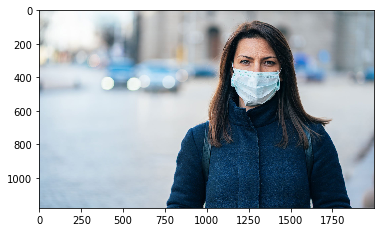

In [79]:
pre("wm.jpg")